## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import minmax_scale
import os
import pathlib
import pickle

In [6]:
import spotipy
import spotipy.util
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
import requests

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [9]:
from bokeh.io import output_file, show, export_png
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn

## Data Gathering and Preprocessing

In [10]:
# Spotify auth
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='4d33cabfb5d14649b3d851d9f5123dc8', client_secret='40017896f3a44adbb0837df1518fbebd',))

# Get the columns for tracks
track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id='7qACZGMjyo64TdUdKAegjp', fields='items(track(id))')
sp.audio_features(track_ids['items'][0]['track']['id'])

[{'danceability': 0.705,
  'energy': 0.483,
  'key': 1,
  'loudness': -12.209,
  'mode': 1,
  'speechiness': 0.0542,
  'acousticness': 0.15,
  'instrumentalness': 0.0265,
  'liveness': 0.202,
  'valence': 0.713,
  'tempo': 122.863,
  'type': 'audio_features',
  'id': '2Cg3GUkhjX96nO4p2WRlIa',
  'uri': 'spotify:track:2Cg3GUkhjX96nO4p2WRlIa',
  'track_href': 'https://api.spotify.com/v1/tracks/2Cg3GUkhjX96nO4p2WRlIa',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Cg3GUkhjX96nO4p2WRlIa',
  'duration_ms': 181786,
  'time_signature': 4}]

In [11]:
genres = 'pop rock metal hiphop electronic classical country jazz blues reggae'.split()

playlists = '''6gS3HhOiI17QNojjPuPzqc 7dowgSWOmvdpwNkGFMUs6e 3pBfUFu8MkyiCYyZe849Ks 6MXkE0uYF4XwU4VTtyrpfP 
            6I0NsYzfoj7yHXyvkZYoRx 3HYK6ri0GkvRcM6GkKh0hJ 4mijVkpSXJziPiOrK7YX4M 
            5EyFMotmvSfDAZ4hSdKrbx 7dowgSWOmvdpwNkGFMUs6e 6I0NsYzfoj7yHXyvkZYoRx'''.split()

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'tempo', 'genre']

In [12]:
to_append = []

for g in zip(genres, playlists):
    track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id=g[1], fields='items(track(id))')
    tracks_list = []
    
    for track in track_ids['items']:
        tracks_list.append(track['track']['id'])

    # Spotipy allows reading 100 data with single request and you can only write 50 at a time
    # so I need to make seperate requests
    tracks_af = sp.audio_features(tracks_list[:50])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    tracks_af = sp.audio_features(tracks_list[50:100])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id=g[1], fields='items(track(id))', offset=100)
    
    for track in track_ids['items']:
        tracks_list.append(track['track']['id'])
    
    tracks_af = sp.audio_features(tracks_list[100:150])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    tracks_af = sp.audio_features(tracks_list[150:200])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id=g[1], fields='items(track(id))', offset=200)
    
    for track in track_ids['items']:
        tracks_list.append(track['track']['id'])
    
    tracks_af = sp.audio_features(tracks_list[200:250])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    tracks_af = sp.audio_features(tracks_list[250:300])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id=g[1], fields='items(track(id))', offset=300)
    
    for track in track_ids['items']:
        tracks_list.append(track['track']['id'])
    
    tracks_af = sp.audio_features(tracks_list[300:350])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    tracks_af = sp.audio_features(tracks_list[350:400])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)
        
    track_ids = sp.user_playlist_tracks('thesoundsofspotify', playlist_id=g[1], fields='items(track(id))', offset=400)
    
    for track in track_ids['items']:
        tracks_list.append(track['track']['id'])
    
    tracks_af = sp.audio_features(tracks_list[400:450])
    for track_num in range(0, 50):
        track_data = []
        track_data.append(tracks_af[track_num]['danceability'])
        track_data.append(tracks_af[track_num]['energy'])
        track_data.append(tracks_af[track_num]['key'])
        track_data.append(tracks_af[track_num]['loudness'])
        track_data.append(tracks_af[track_num]['mode'])
        track_data.append(tracks_af[track_num]['speechiness'])
        track_data.append(tracks_af[track_num]['acousticness'])
        track_data.append(tracks_af[track_num]['instrumentalness'])
        track_data.append(tracks_af[track_num]['liveness'])
        track_data.append(tracks_af[track_num]['valence'])
        track_data.append(tracks_af[track_num]['tempo'])
        track_data.append(g[0])
        to_append.append(track_data)

audio_data = pd.DataFrame(to_append, columns=columns)
audio_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.823,0.544,5,-7.132,1,0.0715,0.02150,0.003150,0.0966,0.6640,149.903,pop
1,0.573,0.739,0,-5.740,1,0.1290,0.02850,0.000000,0.1110,0.4510,97.085,pop
2,0.538,0.512,4,-4.548,0,0.0262,0.22000,0.000000,0.1010,0.1200,144.978,pop
3,0.259,0.437,11,-6.589,0,0.0386,0.10200,0.000001,0.1060,0.0951,180.042,pop
4,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.3940,104.988,pop
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.672,0.248,5,-14.743,0,0.0390,0.43000,0.794000,0.1530,0.2270,140.109,reggae
4496,0.661,0.537,6,-11.530,1,0.0281,0.30200,0.584000,0.1440,0.2570,124.001,reggae
4497,0.457,0.835,1,-4.359,0,0.0385,0.00122,0.522000,0.0929,0.1850,170.455,reggae
4498,0.587,0.523,9,-9.947,1,0.0288,0.11000,0.765000,0.1070,0.0457,95.004,reggae


In [13]:
audio_data.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
2738,0.645,0.6930,0,-6.481,1,0.0344,0.081100,0.000012,0.1750,0.5530,97.555,country
758,0.364,0.9350,2,-6.548,1,0.0724,0.000009,0.729000,0.0317,0.4780,92.717,rock
4265,0.711,0.5800,8,-12.792,1,0.0347,0.531000,0.747000,0.0718,0.6500,102.284,reggae
2446,0.135,0.0268,5,-27.796,1,0.0432,0.939000,0.928000,0.1830,0.0353,78.037,classical
1047,0.475,0.9700,8,-4.281,1,0.0953,0.000234,0.374000,0.0903,0.3060,163.078,metal


## Basic Data Analysis

In [14]:
# Correlation
corr = audio_data.drop(['genre'], axis=1).corr()

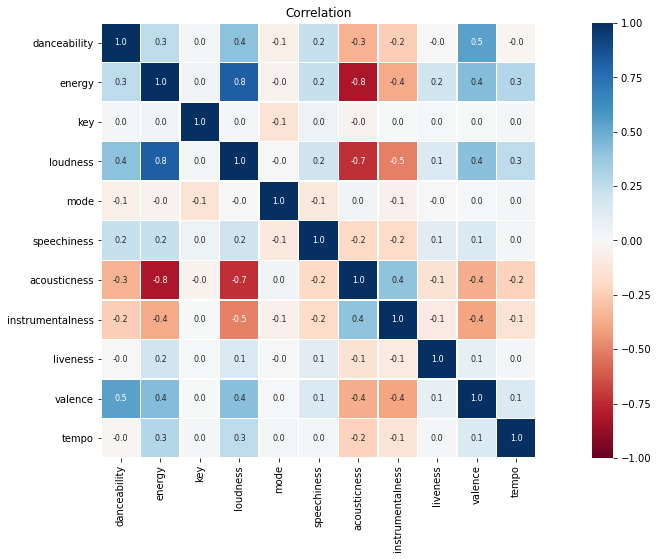

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, linewidth=.5, square=True, annot = True, annot_kws = {'size':8}, fmt='.1f', cmap='RdBu')
plt.title('Correlation')
plt.show()

In [16]:
audio_data.to_pickle('first_audio_data.pkl')

In [17]:
audio_data = pd.read_pickle('first_audio_data.pkl')

## Training

In [18]:
X_train, X_test, label_train, label_test = train_test_split(audio_data.drop('genre', axis=1), audio_data['genre'], \
                                                            test_size=0.2, random_state=112)

In [135]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  30.53%
Test set:  26.00%


In [127]:
logit = LogisticRegression(C = 12.4, max_iter=10000)
lrfit = logit.fit(X_train, label_train)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  52.78%
Test set:  51.67%


In [136]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, label_train)
lda.score(X_test, label_test)

0.48

##### Normalize tempo attribute with z-score

In [20]:
audio_data_normalized = pd.read_pickle('first_audio_data.pkl')
audio_data_normalized['tempo'] = (audio_data_normalized['tempo']-audio_data_normalized['tempo'].mean())/audio_data_normalized['tempo'].std()

In [21]:
audio_data_normalized.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.823,0.544,5,-7.132,1,0.0715,0.0215,0.003150,0.0966,0.6640,1.078870,pop
1,0.573,0.739,0,-5.740,1,0.1290,0.0285,0.000000,0.1110,0.4510,-0.712668,pop
2,0.538,0.512,4,-4.548,0,0.0262,0.2200,0.000000,0.1010,0.1200,0.911819,pop
3,0.259,0.437,11,-6.589,0,0.0386,0.1020,0.000001,0.1060,0.0951,2.101157,pop
4,0.765,0.523,2,-4.333,1,0.0300,0.1840,0.000036,0.1320,0.3940,-0.444605,pop


In [22]:
X_train2, X_test2, label_train2, label_test2 = train_test_split(audio_data_normalized.drop('genre', axis=1), audio_data_normalized['genre'], \
                                                            test_size=0.2, random_state=112)

In [137]:
knnN = KNeighborsClassifier(n_neighbors=67)
knnN.fit(X_train2, label_train2)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knnN.score(X_train2, label_train2)))
print("Test set: {:6.2f}%".format(100*knnN.score(X_test2, label_test2)))

The score for kNN is
Training:  33.69%
Test set:  30.67%


In [125]:
logitN = LogisticRegression(C = 12.4, max_iter=10000)
logitN.fit(X_train2, label_train2)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logitN.score(X_train2, label_train2)))
print("Test set: {:6.2f}%".format(100*logitN.score(X_test2, label_test2)))

The score for logistic regression is
Training:  52.75%
Test set:  51.67%


In [133]:
logitMult = LogisticRegression(C = 12.4, multi_class='multinomial', solver='lbfgs', max_iter=10000)
logitMult.fit(X_train, label_train)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logitMult.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logitMult.score(X_test, label_test)))

The score for logistic regression is
Training:  52.78%
Test set:  51.67%


In [138]:
X_train_mnb = X_train.drop('loudness', axis=1)
X_test_mnb = X_test.drop('loudness', axis=1)
mnb = MultinomialNB()
mnb.fit(X_train_mnb, label_train)
mnb.score(X_test_mnb, label_test)

0.29888888888888887

In [140]:
nb = GaussianNB()
nb.fit(X_train, label_train)
nb.score(X_test, label_test)

0.43777777777777777

In [165]:
svm_model = svm.SVC(C=1.15, kernel='linear')
svm_model.fit(X_train, label_train)

SVC(C=1.15, kernel='linear')

In [166]:
svm_model.score(X_test, label_test)

0.52

In [175]:
svm_modelN = svm.SVC(C=1.05, kernel='linear')
svm_modelN.fit(X_train2, label_train2)

SVC(C=1.05, kernel='linear')

In [176]:
svm_modelN.score(X_test2, label_test2)

0.5177777777777778

In [106]:
decisiontree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=36, splitter='best')
decisiontree.fit(X_train, label_train)
decisiontree.score(X_test, label_test)

0.4911111111111111

##### Remove mode and key attributes

In [23]:
X_train_fe, X_test_fe, label_train_fe, label_test_fe = train_test_split(audio_data_normalized.drop(['mode', 'key', 'genre'], axis=1), audio_data_normalized['genre'], \
                                                            test_size=0.2, random_state=112)

In [189]:
svm_model_fe = svm.SVC(C=1.05, kernel='linear')
svm_model_fe.fit(X_train_fe, label_train_fe)

SVC(C=1.05, kernel='linear')

In [190]:
svm_model_fe.score(X_test_fe, label_test_fe)

0.5088888888888888

In [204]:
randomforest = RandomForestClassifier(n_estimators=75, max_depth=5, random_state=12)
randomforest.fit(X_train2, label_train2)
randomforest.score(X_test2, label_test2)

0.5133333333333333

In [205]:
randomforest_fe = RandomForestClassifier(n_estimators=75, max_depth=5)
randomforest_fe.fit(X_train_fe, label_train_fe)
randomforest_fe.score(X_test_fe, label_test_fe)

0.5144444444444445

## Grid Search, Fine Tuning (Do not run these Prof., they take very long time)

In [198]:
randf_n_range = list(range(1,100))
randf_depth_range = list(range(2,20))
param_grid_randf = dict(n_estimators=randf_n_range, max_depth=randf_depth_range)
gdrandf = GridSearchCV(randomforest, param_grid_randf)
gdrandf.fit(X_train2, label_train2)
gdrandf.score(X_test2, label_test2)

0.5155555555555555

In [199]:
print(gdrandf.best_score_)
print(gdrandf.best_params_)

0.5027777777777778
{'max_depth': 5, 'n_estimators': 88}


In [202]:
randf2_split_range = list(range(2, 40))
randf2_leaf_range = list(range(2, 20))
param_grid_randf2 = dict(min_samples_split = randf2_split_range, min_samples_leaf = randf2_leaf_range)
gdrandf2 = GridSearchCV(randomforest, param_grid_randf2)
gdrandf2.fit(X_train2, label_train2)
gdrandf2.score(X_test2, label_test2)

0.5133333333333333

In [203]:
print(gdrandf2.best_score_)
print(gdrandf2.best_params_)

0.5033333333333333
{'min_samples_leaf': 3, 'min_samples_split': 7}


In [73]:
gsdt.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [118]:
logit_range = list(range(1,100))
logit_range = [element * 0.2 for element in logit_range]
gdtester = GridSearchCV(logit, dict(C=logit_range, max_iter=[5000]))
gdtester.fit(X_train, label_train)
gdtester.score(X_test, label_test)

C:\Users\Bahadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bahadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.5177777777777778

In [120]:
print(gdtester.best_score_)
print(gdtester.best_params_)

0.5133333333333334
{'C': 12.4, 'max_iter': 5000}


In [51]:
k_range = range(1,100)
k_scores = []
gdknnN = GridSearchCV(knnN, dict(n_neighbors=k_range), cv=10, scoring='accuracy')
gdknnN.fit(X_train2, label_train2)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=99),
             param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy')

In [63]:
print(gdknnN.best_score_)
print(gdknnN.best_params_)

0.2997222222222222
{'n_neighbors': 38}
KNeighborsClassifier(n_neighbors=38)


In [97]:
max_depth_range = list(range(1,15))
min_samples_split_range = list(range(2, 40))
min_samples_leaf_range = list(range(2, 20))
param_grid_dectree = dict(max_depth = max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)
print(param_grid_dectree)

gddectree = GridSearchCV(decisiontree, param_grid_dectree)
gddectree.fit(X_train, label_train)
gddectree.score(X_test, label_test)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


0.48444444444444446

In [99]:
print(gddectree.best_score_)
print(gddectree.best_params_)

0.48111111111111116
{'max_depth': 8, 'min_samples_leaf': 14, 'min_samples_split': 36}


In [157]:
svm_range = list(range(1,20))
svm_range = [element * 1 for element in svm_range]
gdsvm = GridSearchCV(svm_model, dict(C=svm_range))
gdsvm.fit(X_train, label_train)
gdsvm.score(X_test, label_test)

0.5266666666666666

In [158]:
print(gdsvm.best_score_)
print(gdsvm.best_params_)

0.5163888888888889
{'C': 19}


## Graphs

In [78]:
audio_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [79]:
randomforest.feature_importances_

array([0.16317191, 0.16297898, 0.0028944 , 0.13847232, 0.01066809,
       0.12993319, 0.1828409 , 0.1385598 , 0.00659087, 0.04949917,
       0.01439037])

In [206]:
data = dict(
        models=['KNN', 'Log. Reg.', 'KNN (Norm. tempo)', 'Log. Reg. (Norm. tempo)',
                'LDA', 'Mult. Reg.', 'Mult. NB', 'Gauss. NB', 'SVM', 'Dec. Tree', 'Rand. Forest'],
        scores=['{:6.2f}%'.format(100*knn.score(X_test, label_test)), 
                '{:6.2f}%'.format(100*logit.score(X_test, label_test)),
                '{:6.2f}%'.format(100*knnN.score(X_test2, label_test2)),
                '{:6.2f}%'.format(100*logitN.score(X_test2, label_test2)), 
                '{:6.2f}%'.format(100*lda.score(X_test, label_test)), 
                '{:6.2f}%'.format(100*logitMult.score(X_test, label_test)),
                '{:6.2f}%'.format(100*mnb.score(X_test_mnb, label_test)), 
                '{:6.2f}%'.format(100*nb.score(X_test, label_test)), 
                '{:6.2f}%'.format(100*svm_model.score(X_test, label_test)),
                '{:6.2f}%'.format(100*decisiontree.score(X_test, label_test)), 
                '{:6.2f}%'.format(100*randomforest.score(X_test, label_test))],
    )
source = ColumnDataSource(data)

columns = [
        TableColumn(field="models", title="Models"),
        TableColumn(field="scores", title="Scores"),
    ]
data_table = DataTable(source=source, columns=columns, width=400, height=320)

show(data_table)

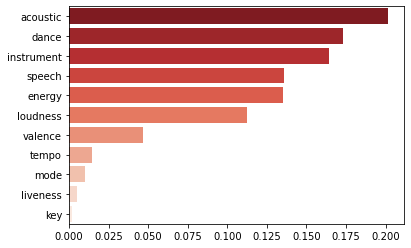

In [209]:
sns_plot = sns.barplot(y=['dance', 'energy', 'key', 'loudness', 'mode', 'speech',
       'acoustic', 'instrument', 'liveness', 'valence', 'tempo'], x=randomforest.feature_importances_,
                      palette='Reds_r', order=['acoustic', 'dance', 'instrument', 'speech', 'energy', 'loudness', 'valence', 'tempo', 'mode', 'liveness', 'key'])
sns_fig = sns_plot.get_figure()
sns_fig.savefig('feature_importance.png')